<a href="https://colab.research.google.com/github/Meraz2837/Ethnic-Group-Classification-Using-Transfer-Learning/blob/main/ethnic_groups_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import PIL.Image as im
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
#Variables
Labels = ['East Asian', "Indian", 'Southeast Asian']

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [14]:
vgg = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [15]:
  
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Research Assistant/Datasets/Train/*')
folders
  

['/content/drive/MyDrive/Research Assistant/Datasets/Train/East Asian',
 '/content/drive/MyDrive/Research Assistant/Datasets/Train/Southeast Asian',
 '/content/drive/MyDrive/Research Assistant/Datasets/Train/Indian']

In [16]:
# our layers
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
# optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [20]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research Assistant/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 3047 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research Assistant/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 605 images belonging to 3 classes.


In [22]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
96/96 [==============================] - 1277s 13s/step - loss: 4.3608 - accuracy: 0.4608 - val_loss: 1.8351 - val_accuracy: 0.6843
Epoch 2/5
96/96 [==============================] - 92s 951ms/step - loss: 3.1594 - accuracy: 0.5819 - val_loss: 2.2378 - val_accuracy: 0.6777
Epoch 3/5
96/96 [==============================] - 87s 905ms/step - loss: 2.6692 - accuracy: 0.6515 - val_loss: 2.1227 - val_accuracy: 0.6926
Epoch 4/5
96/96 [==============================] - 95s 990ms/step - loss: 2.4582 - accuracy: 0.6820 - val_loss: 1.7436 - val_accuracy: 0.7405
Epoch 5/5
96/96 [==============================] - 86s 897ms/step - loss: 2.1989 - accuracy: 0.6997 - val_loss: 1.1933 - val_accuracy: 0.8017


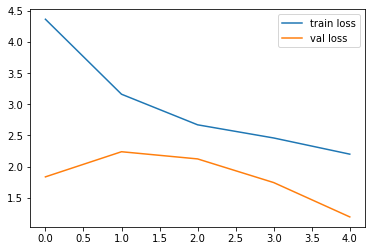

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

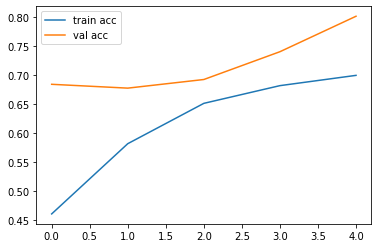

In [24]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

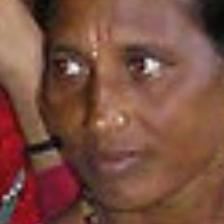

In [25]:
path = glob('/content/drive/MyDrive/Research Assistant/Datasets/Train/Indian/*')
predict = path[55]
openpredict = im.open(predict)
openpredict


In [26]:
openpredict = np.array(openpredict)/255.0
openpredict.shape

(224, 224, 3)

In [27]:
finalPrediction = openpredict[np.newaxis,...]
predict_array = model.predict(finalPrediction)
index = np.argmax(predict_array)
print('Predicted Class: ', Labels[index])

Predicted Class:  Indian


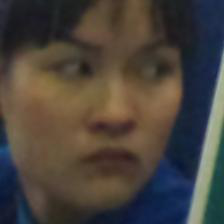

In [28]:
path = glob('/content/drive/MyDrive/Research Assistant/Datasets/Train/East Asian/*')
predict = path[0]
openpredict = im.open(predict)
openpredict


In [29]:
openpredict = np.array(openpredict)/255.0
openpredict.shape

(224, 224, 3)

In [31]:
finalPrediction = openpredict[np.newaxis,...]
predict_array = model.predict(finalPrediction)
index = np.argmax(predict_array)
print('Predicted Class: ', Labels[index])

Predicted Class:  East Asian


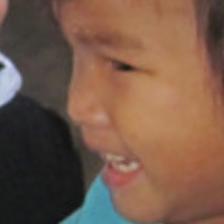

In [32]:
path = glob('/content/drive/MyDrive/Research Assistant/Datasets/Train/Southeast Asian/*')
predict = path[5]
openpredict = im.open(predict)
openpredict


In [33]:
openpredict = np.array(openpredict)/255.0
openpredict.shape
finalPrediction = openpredict[np.newaxis,...]
predict_array = model.predict(finalPrediction)
index = np.argmax(predict_array)
print('Predicted Class: ', Labels[index])

Predicted Class:  Southeast Asian
